In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('EfficientNet_Fer2013'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

EfficientNet_Fer2013\test\angry\im0.png
EfficientNet_Fer2013\test\angry\im1.png
EfficientNet_Fer2013\test\angry\im10.png
EfficientNet_Fer2013\test\angry\im100.png
EfficientNet_Fer2013\test\angry\im101.png
EfficientNet_Fer2013\test\angry\im102.png
EfficientNet_Fer2013\test\angry\im103.png
EfficientNet_Fer2013\test\angry\im104.png
EfficientNet_Fer2013\test\angry\im105.png
EfficientNet_Fer2013\test\angry\im106.png
EfficientNet_Fer2013\test\angry\im107.png
EfficientNet_Fer2013\test\angry\im108.png
EfficientNet_Fer2013\test\angry\im109.png
EfficientNet_Fer2013\test\angry\im11.png
EfficientNet_Fer2013\test\angry\im110.png
EfficientNet_Fer2013\test\angry\im111.png
EfficientNet_Fer2013\test\angry\im112.png
EfficientNet_Fer2013\test\angry\im113.png
EfficientNet_Fer2013\test\angry\im114.png
EfficientNet_Fer2013\test\angry\im115.png
EfficientNet_Fer2013\test\angry\im116.png
EfficientNet_Fer2013\test\angry\im117.png
EfficientNet_Fer2013\test\angry\im118.png
EfficientNet_Fer2013\test\angry\im119.pn

In [2]:
# libraries for system
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image


# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report



#import DL libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


In [3]:
train_dir = 'EfficientNet_Fer2013/train'
filepaths = []
labels = []

folds = os.listdir(train_dir)
for fold in folds:
    foldpath = os.path.join(train_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
train_df = pd.concat([Fseries, Lseries], axis= 1)

In [4]:
train_df

,filepaths,labels
0,EfficientNet_Fer2013/train\angry\im0.png,angry
1,EfficientNet_Fer2013/train\angry\im1.png,angry
2,EfficientNet_Fer2013/train\angry\im10.png,angry
3,EfficientNet_Fer2013/train\angry\im100.png,angry
4,EfficientNet_Fer2013/train\angry\im1000.png,angry
...,...,...
28704,EfficientNet_Fer2013/train\surprised\im995.png,surprised
28705,EfficientNet_Fer2013/train\surprised\im996.png,surprised
28706,EfficientNet_Fer2013/train\surprised\im997.png,surprised
28707,EfficientNet_Fer2013/train\surprised\im998.png,surprised


In [6]:
# Generate  test data paths with labels
test_dir = 'EfficientNet_Fer2013/test'
filepaths = []
labels = []

folds = os.listdir(test_dir)
for fold in folds:
    foldpath = os.path.join(test_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
test_df = pd.concat([Fseries, Lseries], axis= 1)

In [7]:
test_df

,filepaths,labels
0,EfficientNet_Fer2013/test\angry\im0.png,angry
1,EfficientNet_Fer2013/test\angry\im1.png,angry
2,EfficientNet_Fer2013/test\angry\im10.png,angry
3,EfficientNet_Fer2013/test\angry\im100.png,angry
4,EfficientNet_Fer2013/test\angry\im101.png,angry
...,...,...
7173,EfficientNet_Fer2013/test\surprised\im95.png,surprised
7174,EfficientNet_Fer2013/test\surprised\im96.png,surprised
7175,EfficientNet_Fer2013/test\surprised\im97.png,surprised
7176,EfficientNet_Fer2013/test\surprised\im98.png,surprised


In [8]:
# valid and test dataframe
valid_df, test_df = train_test_split(test_df,  train_size= 0.6, shuffle= True, random_state= 123)

In [9]:
# crobed image size
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()
train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 28709 validated image filenames belonging to 7 classes.
Found 4306 validated image filenames belonging to 7 classes.
Found 2872 validated image filenames belonging to 7 classes.


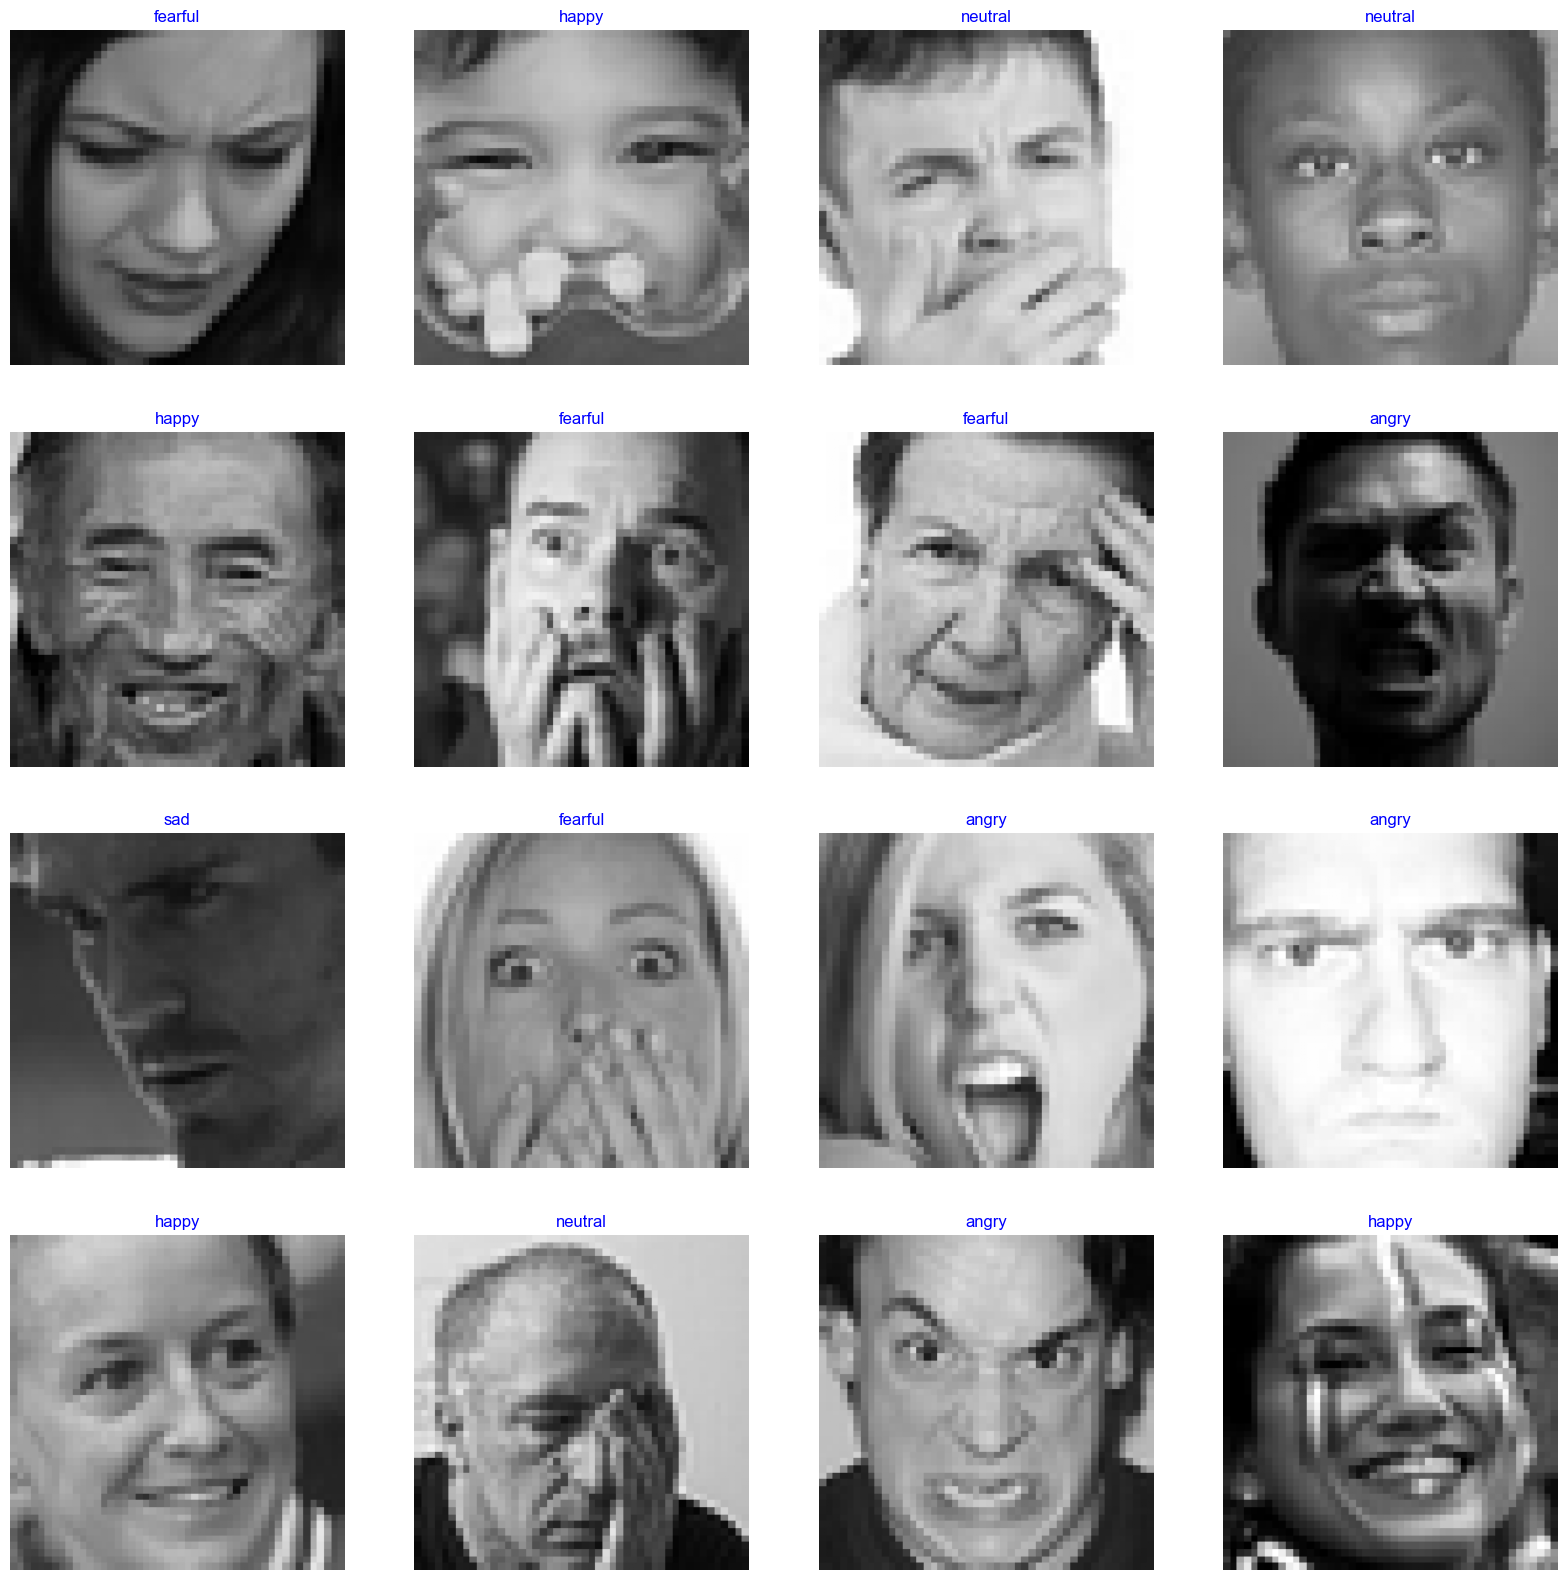

In [10]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

In [12]:
#Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# create pre-trained model (you can built on pretrained model such as :  efficientnet, VGG , Resnet )
# we will use efficientnetb3 from EfficientNet family.
base_model = tf.keras.applications.efficientnet.EfficientNetB7(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')
# base_model.trainable = False
model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb7 (Functional)     │ (None, 2560)           │    64,097,687 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 2560)           │        10,240 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       655,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,765,342 (247.06 MB)

 Trainable params: 64,449,495 (245.86 MB)

 Non-trainable params: 315,847 (1.20 MB)

In [13]:
batch_size = 20
epochs =  10

history = model.fit(x= train_gen, epochs= epochs, verbose= 1, validation_data= valid_gen,
                    validation_steps= None, shuffle= False)

Epoch 1/10
   7/1795 ━━━━━━━━━━━━━━━━━━━━ 3:08:48 6s/step - accuracy: 0.1526 - loss: 23.3423

KeyboardInterrupt: 